# Начало работы

In [72]:
# Импорт библиотек
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import rc
import random
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [89]:
sent = "apple-яблоко, дверь , вода.265"

In [92]:
patt = "[^а-яА-Я0-9]" 

In [93]:
re.sub(patt,' ', sent)

'      яблоко  дверь   вода 265'

### Загрузка данных и их проверка

In [126]:
data = pd.read_csv(r"C:\Users\Данил\Desktop\Lkz\Lkz\dataset.csv", sep = ";", encoding="windows-1251", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,Unity 3D,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Разработка мобильных приложений(юниоры),Смартфоны продаются и продажи только растут. К...,Организация и управление работой,5,Специалист должен знать и понимать: • Принципы...,"Решение проблем, инновационность и инициативность",5,Специалист должен знать и понимать: • Общие ти...,Анализ и проектирование мобильного приложения,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Преподавание в младших классах,Высококвалифицированные специалисты в сфере на...,Общекультурное развитие,10,Специалист должен знать и понимать:\n• Основы ...,Культура безопасного труда Организация рабочег...,5,Специалист должен знать и понимать: Участник к...,Общепрофессиональное развитие,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Дошкольное воспитание(юниоры),Воспитатель детей дошкольного возраста осущес...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать:\n• Стандар...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать: • основную...,Использование информационно-коммуникационных т...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Дошкольное воспитание,Воспитатель детей дошкольного возраста осущест...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать: • Стандарт...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать:\n• основну...,Использование информационно-коммуникационных т...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df = pd.DataFrame(columns=['0', '1', '2', '3', '4'])

In [128]:
data.shape

(130, 32)

In [129]:
# Цикл преобразует структуру в нужный нам вид
for i in range(data.shape[0]):
    j=2
    while j < data.shape[1]:
        df.loc[len(df)] = [data.loc[i, 0], data.loc[i, 1], data.loc[i, j], data.loc[i, j+1], data.loc[i, j+2]]
        j+=3

In [130]:
df.columns = ['Компетенция', 'Описание', 'Показатель', 'Процент', 'Умения']

In [131]:
df.head(5)

,Компетенция,Описание,Показатель,Процент,Умения
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...
1,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...
2,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,Специалист должен знать и понимать: • Основные...
3,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,Специалист должен знать и понимать: • Особенно...
4,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,Специалист должен знать и понимать: • Важность...


In [132]:
df = df.dropna()
df = df.reset_index(drop=True)

### Значение артибута "Умения" записываются в лист

In [133]:
all_w = list(df["Умения"])

# Создание словаря методом TF-IDF

### Анализ предложений и вывод словаря

In [134]:
# Функция лематизация с детокенизацией
stopwords_ru = stopwords.words("russian")
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
morph = MorphAnalyzer()
def preprocess_for_tfidif(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        token = token.strip()
        token = morph.normal_forms(token)[0]           
        tokens.append(token)
    return (' '.join(tokens))

In [135]:
# Функция tf_idf нахождения ключевых слов
def prod_tf_idf_key(some_texts, number_of_words):
    tf_idf = TfidfVectorizer (stop_words=stopwords_ru)
    texts_as_tfidf_vectors=tf_idf.fit_transform(preprocess_for_tfidif(text) for text in some_texts)
    id2word = {i:word for i,word in enumerate(tf_idf.get_feature_names())}
    dictonary = []
    for text_row in range(texts_as_tfidf_vectors.shape[0]):
        row_data = texts_as_tfidf_vectors.getrow(text_row)
        words_for_this_text = row_data.toarray().argsort()
        top_words_for_this_text = words_for_this_text [0,:-1*(number_of_words+1):-1]
        dictonary.append([id2word[w] for w in top_words_for_this_text])
    return dictonary

In [136]:
%%time
dictonary = []
dictonary = prod_tf_idf_key(all_w, 6)
dictonary[:5]

Wall time: 53.4 s


[['продуктивный',
  'навык',
  'самый',
  'сравнение',
  'исследовательский',
  'предоставить'],
 ['программирование',
  'ориентировать',
  'пользоваться',
  'алгоритм',
  'программировань',
  'событийный'],
 ['сцена', 'объект', 'компонент', 'игровой', 'работать', 'верстать'],
 ['оптимизировать',
  'приложение',
  'игра',
  'мобильный',
  'оптимизация',
  'компьютерный'],
 ['схема',
  'приложение',
  'проектирование',
  'важность',
  'уместность',
  'здравый']]

### Создание нового атибута на основе словаря

In [137]:
df['Словарь'] = dictonary

In [138]:
df.head()

,Компетенция,Описание,Показатель,Процент,Умения,Словарь
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,"[продуктивный, навык, самый, сравнение, исслед..."
1,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,"[программирование, ориентировать, пользоваться..."
2,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,Специалист должен знать и понимать: • Основные...,"[сцена, объект, компонент, игровой, работать, ..."
3,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,Специалист должен знать и понимать: • Особенно...,"[оптимизировать, приложение, игра, мобильный, ..."
4,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,Специалист должен знать и понимать: • Важность...,"[схема, приложение, проектирование, важность, ..."


### Создание словаря по атрибуту 'описание'

In [139]:
all_w = list(df["Описание"])

In [140]:
%%time
dictonary = []
dictonary = prod_tf_idf_key(all_w, 6)
dictonary[:5]

Wall time: 2min 29s


[['игра',
  'приложение',
  'разработка',
  'компьютерный',
  'игровой',
  'пользователь'],
 ['игра',
  'приложение',
  'разработка',
  'компьютерный',
  'игровой',
  'пользователь'],
 ['игра',
  'приложение',
  'разработка',
  'компьютерный',
  'игровой',
  'пользователь'],
 ['игра',
  'приложение',
  'разработка',
  'компьютерный',
  'игровой',
  'пользователь'],
 ['игра',
  'приложение',
  'разработка',
  'компьютерный',
  'игровой',
  'пользователь']]

In [141]:
df['Словарь_Описание'] = dictonary
df.head()

,Компетенция,Описание,Показатель,Процент,Умения,Словарь,Словарь_Описание
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,"[продуктивный, навык, самый, сравнение, исслед...","[игра, приложение, разработка, компьютерный, и..."
1,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,"[программирование, ориентировать, пользоваться...","[игра, приложение, разработка, компьютерный, и..."
2,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,Специалист должен знать и понимать: • Основные...,"[сцена, объект, компонент, игровой, работать, ...","[игра, приложение, разработка, компьютерный, и..."
3,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,Специалист должен знать и понимать: • Особенно...,"[оптимизировать, приложение, игра, мобильный, ...","[игра, приложение, разработка, компьютерный, и..."
4,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,Специалист должен знать и понимать: • Важность...,"[схема, приложение, проектирование, важность, ...","[игра, приложение, разработка, компьютерный, и..."


### Удаление ненужных теперь атрибутов

##### Удаляем атрибуты 'Описание' и 'Умения' так как мы выделили для них ключевые слова и записали их как отдельные атрибуты

In [142]:
df.drop(['Описание','Умения'], axis=1, inplace=True)

In [143]:
df.head(10)

,Компетенция,Показатель,Процент,Словарь,Словарь_Описание
0,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,"[продуктивный, навык, самый, сравнение, исслед...","[игра, приложение, разработка, компьютерный, и..."
1,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,"[программирование, ориентировать, пользоваться...","[игра, приложение, разработка, компьютерный, и..."
2,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,"[сцена, объект, компонент, игровой, работать, ...","[игра, приложение, разработка, компьютерный, и..."
3,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,"[оптимизировать, приложение, игра, мобильный, ...","[игра, приложение, разработка, компьютерный, и..."
4,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,"[схема, приложение, проектирование, важность, ...","[игра, приложение, разработка, компьютерный, и..."
5,Разработка компьютерных игр и мультимедийных п...,Публикация,5,"[билд, приложение, ос, запустить, продемонстри...","[игра, приложение, разработка, компьютерный, и..."
6,Разработка мобильных приложений(юниоры),Организация и управление работой,5,"[навык, продуктивный, самый, сравнение, работа...","[мобильный, приложение, расти, вкладывать, про..."
7,Разработка мобильных приложений(юниоры),"Решение проблем, инновационность и инициативность",5,"[проблема, навык, возникнуть, решение, разрабо...","[мобильный, приложение, расти, вкладывать, про..."
8,Разработка мобильных приложений(юниоры),Анализ и проектирование мобильного приложения,30,"[схема, проектирование, приложение, важность, ...","[мобильный, приложение, расти, вкладывать, про..."
9,Разработка мобильных приложений(юниоры),Разработка мобильных приложений,50,"[важность, данные, например, разработка, приня...","[мобильный, приложение, расти, вкладывать, про..."


In [144]:
#df.to_csv('C:\\Users\\Данил\\Desktop\\Data.csv', index=False)

In [172]:
df = pd.read_csv(r"C:\Users\Данил\Desktop\Data.csv")

### Объединение 2 словарей в 1

In [173]:
df["Словарь"] = df["Словарь"]+df["Словарь_Описание"]

In [174]:
df.drop(['Словарь_Описание'], axis=1, inplace=True)

In [148]:
df.head()

,Компетенция,Показатель,Процент,Словарь
0,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,"['продуктивный', 'навык', 'самый', 'сравнение'..."
1,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,"['программирование', 'ориентировать', 'пользов..."
2,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,"['сцена', 'объект', 'компонент', 'игровой', 'р..."
3,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,"['оптимизировать', 'приложение', 'игра', 'моби..."
4,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,"['схема', 'приложение', 'проектирование', 'важ..."


# Кластеризация

### Создание матрицы весов TF-IDF

In [94]:
d1 = list(df["Словарь"])

In [95]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, use_idf=True, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(d1)
print(tfidf_matrix.shape)

(807, 702)


##### Кластеризировать будем используя данные полученной матрицы

##### Исльпользуем 3 модели: KMeans, MiniBatchKMeans, DBSCAN

In [74]:
from sklearn.cluster import KMeans

In [77]:
%%time
km = KMeans(n_clusters=6)
km.fit(tfidf_matrix)
#idx = km.fit(tfidf_matrix)
km_clusters = km.labels_.tolist()

print(km_clusters)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 

In [97]:
from sklearn.cluster import MiniBatchKMeans

In [101]:
mbk = MiniBatchKMeans(init='random', n_clusters=6)
#mbk.fit_transform(tfidf_matrix)
%time mbk.fit(tfidf_matrix)
miniclusters = mbk.labels_.tolist()
print (miniclusters)

Wall time: 48 ms
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3

In [94]:
from sklearn.cluster import DBSCAN

In [127]:
db = DBSCAN(eps=0.3, min_samples=10).fit(tfidf_matrix)
labels = db.labels_.tolist()
print(labels)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

### Посмотрим как распределились данные

In [104]:
out = { 'title': d1, 'cluster': km_clusters }
frame = pd.DataFrame(out, columns = ['title', 'cluster'])
frame['cluster'].value_counts()

0    463
2    119
1    109
3     65
5     46
4     20
Name: cluster, dtype: int64

In [117]:
out2 = { 'title': d1, 'cluster': miniclusters }
frame2 = pd.DataFrame(out2, columns = ['title', 'cluster'])
frame2['cluster'].value_counts()

4    548
0     90
2     78
1     46
5     32
3     28
Name: cluster, dtype: int64

In [128]:
out3 = { 'title': d1, 'cluster': labels }
frame3 = pd.DataFrame(out3, columns = ['title', 'cluster'])
frame3['cluster'].value_counts()

-1    760
 2     16
 0     16
 1     10
 4     10
 3     10
Name: cluster, dtype: int64

##### Более равномерно распределились данные у KMeans, будем считать что этот метод распределил данные правильнее других

In [177]:
df['Группа'] = frame['cluster']

### Назовем класстеры

In [202]:
df[df['Группа']==0]['Компетенция'][:15]

104                                Кровельные работы
105                                Кровельные работы
106                                Кровельные работы
107                                Кровельные работы
108                                Кровельные работы
109                     Кровельные работы по металлу
110                     Кровельные работы по металлу
111                     Кровельные работы по металлу
112                     Кровельные работы по металлу
113                     Кровельные работы по металлу
114                     Кровельные работы по металлу
133    Разработка решений на базе блокчейн технологи
134    Разработка решений на базе блокчейн технологи
135    Разработка решений на базе блокчейн технологи
136    Разработка решений на базе блокчейн технологи
Name: Компетенция, dtype: object

In [210]:
df[df['Группа']==1]['Компетенция'][15:30]

39           Сетевое и системное администрирование
40    Эксплуатация кабельных линий электропередачи
41    Эксплуатация кабельных линий электропередачи
42    Эксплуатация кабельных линий электропередачи
43    Эксплуатация кабельных линий электропередачи
44    Эксплуатация кабельных линий электропередачи
45    Эксплуатация кабельных линий электропередачи
46                   Архитектурная обработка камня
47                   Архитектурная обработка камня
48                   Архитектурная обработка камня
49                   Архитектурная обработка камня
50                   Архитектурная обработка камня
51                   Архитектурная обработка камня
52                   Архитектурная обработка камня
53                  Бетонные строительные работы. 
Name: Компетенция, dtype: object

In [204]:
df[df['Группа']==2]['Компетенция'][:15]

204      Изготовление прототипов (12-14)
205      Изготовление прототипов (12-14)
206      Изготовление прототипов (12-14)
207      Изготовление прототипов (12-14)
208      Изготовление прототипов (12-14)
209      Изготовление прототипов (12-14)
210      Изготовление прототипов (12-14)
211             Изготовление прототипов 
212             Изготовление прототипов 
213             Изготовление прототипов 
214             Изготовление прототипов 
215             Изготовление прототипов 
216             Изготовление прототипов 
217             Изготовление прототипов 
259    Фрезерные работы на станках с ЧПУ
Name: Компетенция, dtype: object

In [211]:
df[df['Группа']==3]['Компетенция'][15:30]

696    Сухое строительство и штукатурные работы (Юниоры)
697    Сухое строительство и штукатурные работы (Юниоры)
698    Сухое строительство и штукатурные работы (Юниоры)
732                                           Флористика
733                                           Флористика
734                                           Флористика
735                                           Флористика
736                                           Флористика
737                                           Флористика
738                                           Флористика
739                                           Флористика
740                                           Флористика
741                                  Флористика (Юниоры)
742                                  Флористика (Юниоры)
743                                  Флористика (Юниоры)
Name: Компетенция, dtype: object

In [209]:
df[df['Группа']==4]['Компетенция'][:15]

0     Разработка компьютерных игр и мультимедийных п...
1     Разработка компьютерных игр и мультимедийных п...
2     Разработка компьютерных игр и мультимедийных п...
3     Разработка компьютерных игр и мультимедийных п...
4     Разработка компьютерных игр и мультимедийных п...
5     Разработка компьютерных игр и мультимедийных п...
6               Разработка мобильных приложений(юниоры)
7               Разработка мобильных приложений(юниоры)
8               Разработка мобильных приложений(юниоры)
9               Разработка мобильных приложений(юниоры)
10              Разработка мобильных приложений(юниоры)
11                       Преподавание в младших классах
12                       Преподавание в младших классах
13                       Преподавание в младших классах
14                       Преподавание в младших классах
Name: Компетенция, dtype: object

In [207]:
df[df['Группа']==5]['Компетенция'][:15]

366            Администрирование отеля
367            Администрирование отеля
368            Администрирование отеля
369            Администрирование отеля
370            Администрирование отеля
371            Администрирование отеля
372            Администрирование отеля
373            Администрирование отеля
374    Администрирование отеля(Юниоры)
375    Администрирование отеля(Юниоры)
376    Администрирование отеля(Юниоры)
377    Администрирование отеля(Юниоры)
378    Администрирование отеля(Юниоры)
379    Администрирование отеля(Юниоры)
380    Администрирование отеля(Юниоры)
Name: Компетенция, dtype: object

In [156]:
df['Группа'] = df['Группа'].map({0: 'Транспорт и логистика', 1: 'Строительство и строительные технологии',
                                 2: 'Производство и инженерные технологии', 3: 'Творчество и дизайн',
                                 4: 'Информационные и коммуникационные технологии', 5: 'Сфера услуг'})

### Визуализиуем кластеры

In [46]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist.shape

(822, 822)

In [147]:
icpa = IncrementalPCA(n_components=2, batch_size=16)
icpa.fit(dist) 
demo2 = icpa.transform(dist)
xs, ys = demo2[:, 0], demo2[:, 1]

In [150]:
#включаем русские символы на графике
font = {'family' : 'Verdana'}#, 'weigth': 'normal'}
rc('font', **font)

In [152]:
def generate_colors(n):
    color_list = []
    for c in range(0,n):
        r = lambda: random.randint(0,255)
        color_list.append( '#%02X%02X%02X' % (r(),r(),r()) )
    return color_list

In [156]:
color_list = generate_colors(6)

In [159]:
cluster_colors = {}
cluster_names = {}
for i, color in enumerate(color_list):
    cluster_colors[i] = color
    cluster_names[i] = i
cluster_colors

{0: '#E240F6',
 1: '#D54986',
 2: '#097B1F',
 3: '#338FE8',
 4: '#7468D7',
 5: '#93366C'}

In [162]:
df_v = pd.DataFrame(dict(x=xs, y=ys, label=km_clusters, title=d1))

In [164]:
groups = df_v.groupby('label')

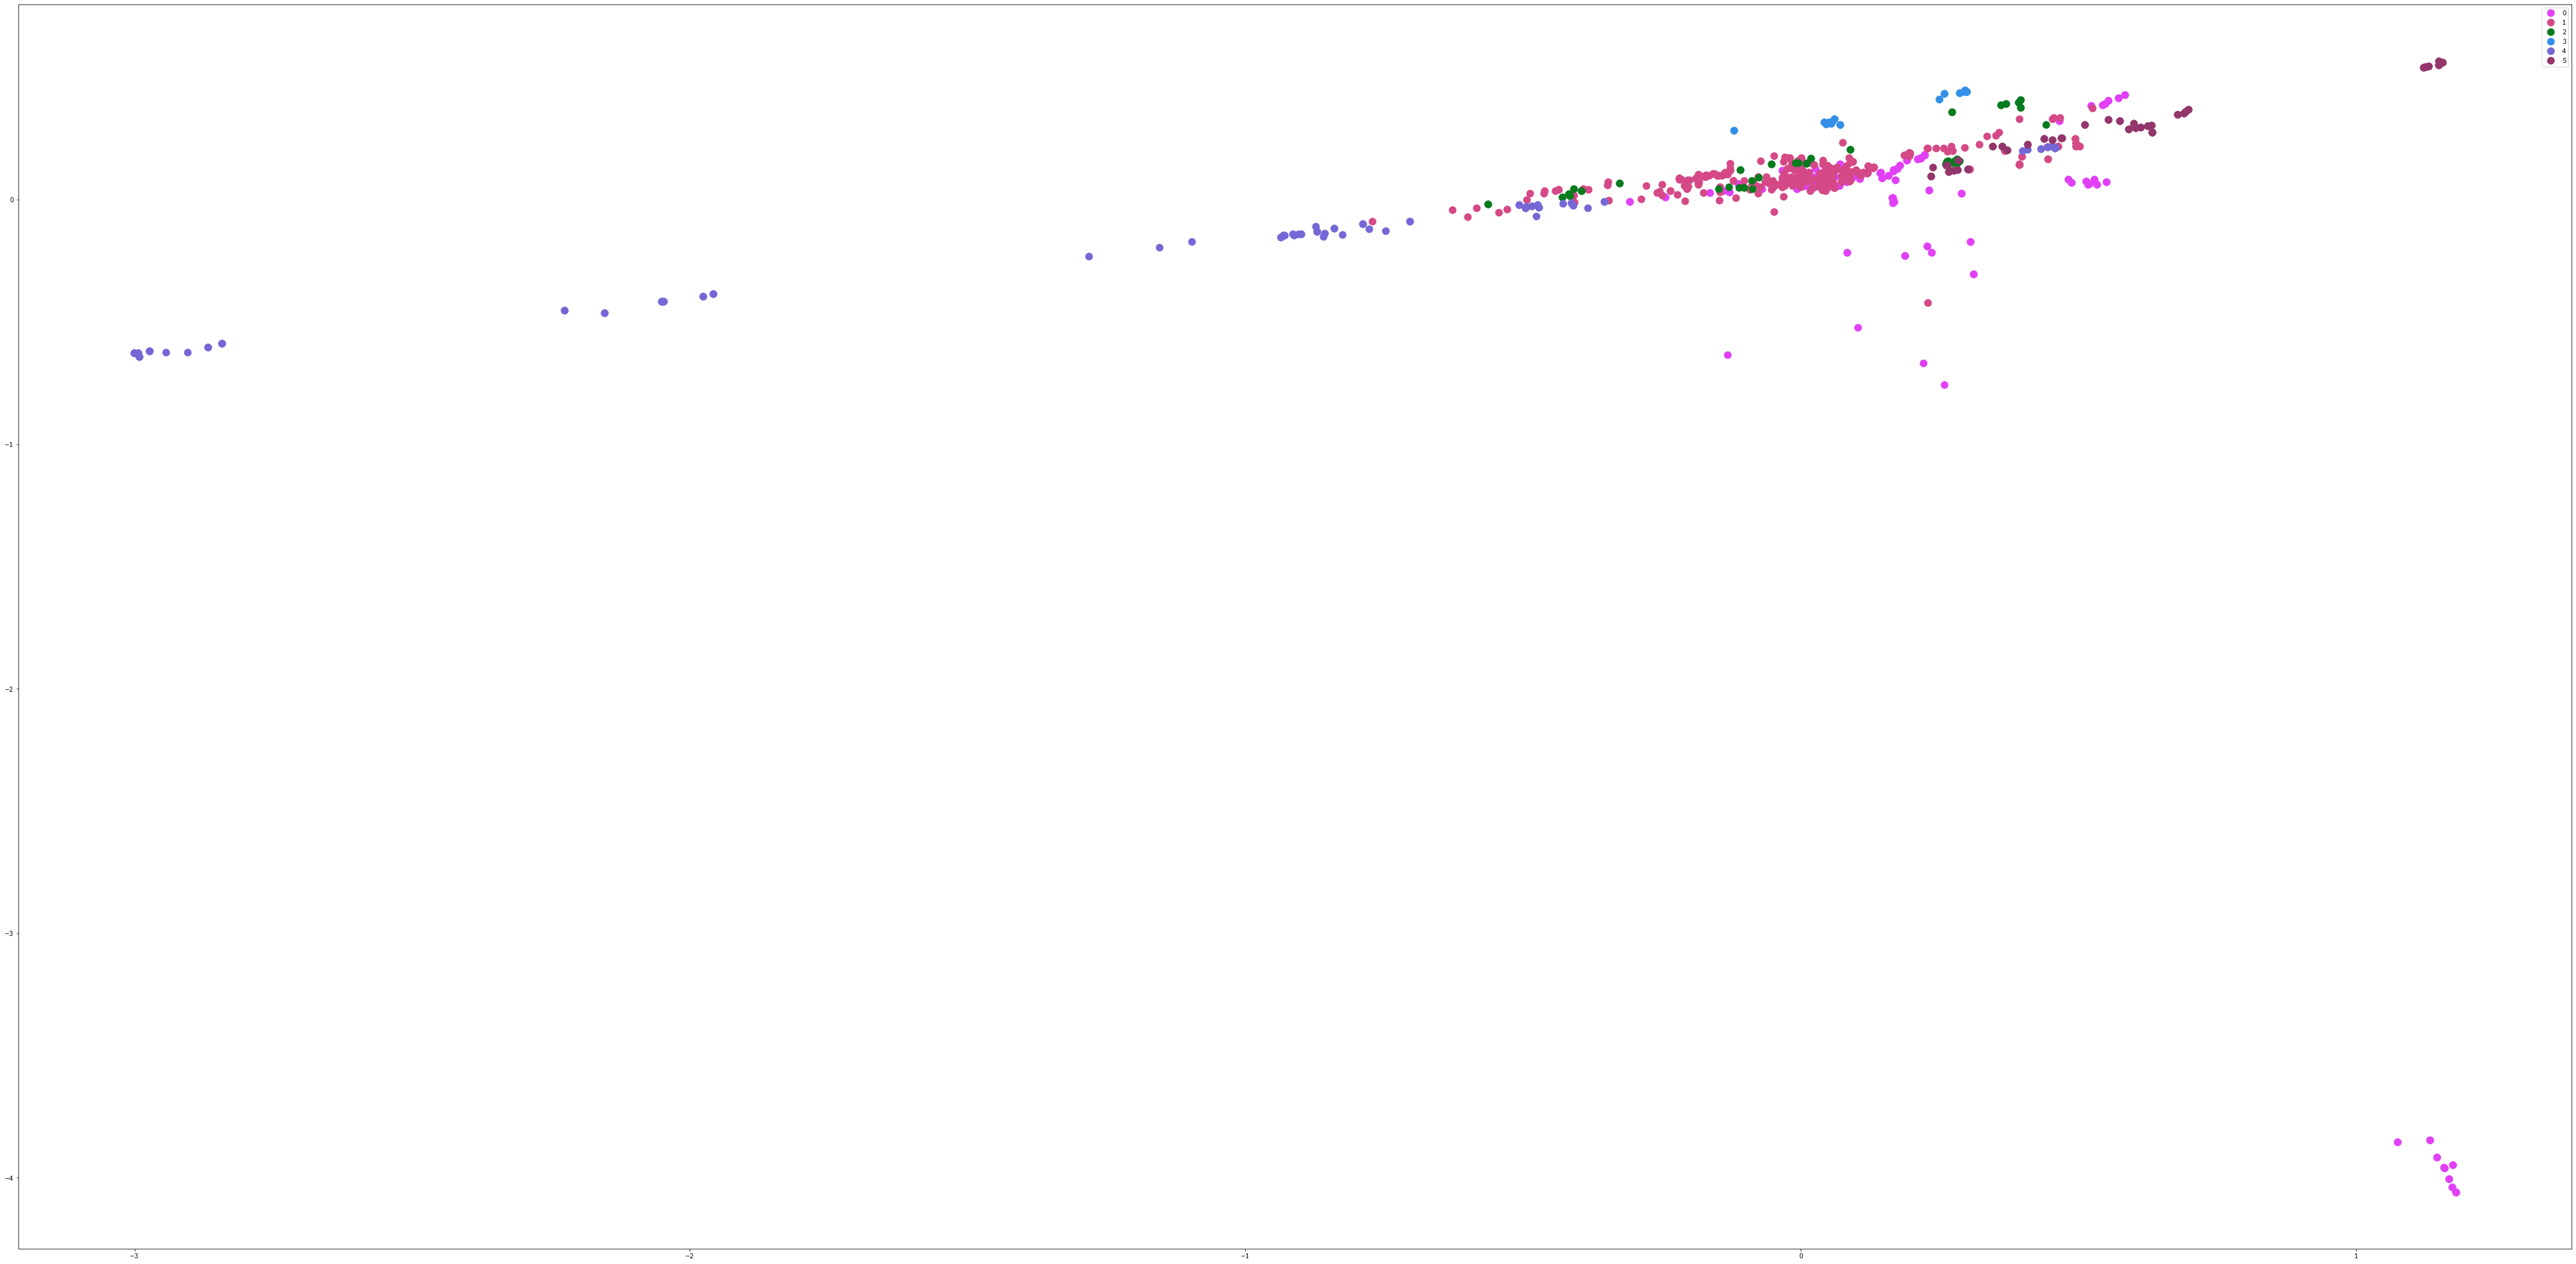

In [174]:
fig, ax = plt.subplots(figsize=(72, 36))
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')

ax.legend()

#показать график
plt.show() 
plt.close()

### Предобработка атрибута 'Процент'

In [241]:
for i, pr in enumerate(df['Процент']):
    #print(pr.replace(',','.'))
    df.loc[i, 'Процент'] = pr.replace(',','.')

In [242]:
df['Процент'] = pd.to_numeric(df['Процент'], errors='coerce')
df = df.dropna()

##### Предобаботка атрибута "Словарь"

In [182]:
df.head()

,Компетенция,Показатель,Процент,Словарь,Группа,Матрица
0,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,"['продуктивный', 'навык', 'самый', 'сравнение'...",3,"(0, 213)\t0.25078931442051977\n (0, 466)\t0..."
1,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,"['программирование', 'ориентировать', 'пользов...",3,"(0, 12)\t0.2555920437198212\n (0, 421)\t0.2..."
2,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,"['сцена', 'объект', 'компонент', 'игровой', 'р...",3,"(0, 458)\t0.20219088664611898\n (0, 210)\t0..."
3,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,"['оптимизировать', 'приложение', 'игра', 'моби...",3,"(0, 298)\t0.20809296774300734\n (0, 213)\t0..."
4,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,"['схема', 'приложение', 'проектирование', 'важ...",3,"(0, 34)\t0.18843107955188365\n (0, 432)\t0...."


In [183]:
df_list = list(df["Словарь"])

In [184]:
list_new = []
for l in df["Словарь"]:
    l1 = l.split(']')[0].split(',')
    l2 = l.split(']')[1].split(',')
    l_new = []
    for l1_w in l1:
        l_new.append(re.sub('[^а-яА-Я]+', '', l1_w))
    for l2_w in l2:
        l_new.append(re.sub('[^а-яА-Я]+', '', l2_w))
    list_new.append(' '.join(l_new))

In [185]:
df["Словарь"] = list_new

### Преоброзование матрицы

In [179]:
for tm in tfidf_matrix:
    print(tm)
    break

  (0, 213)	0.25078931442051977
  (0, 466)	0.25078931442051977
  (0, 418)	0.25078931442051977
  (0, 132)	0.25078931442051977
  (0, 134)	0.25078931442051977
  (0, 212)	0.25078931442051977
  (0, 465)	0.25078931442051977
  (0, 417)	0.25078931442051977
  (0, 131)	0.25078931442051977
  (0, 398)	0.1813806723981947
  (0, 133)	0.23698921765039882
  (0, 211)	0.2287455681405548
  (0, 464)	0.17439088301814962
  (0, 416)	0.20846114300591886
  (0, 130)	0.2262850309921194
  (0, 178)	0.2549632464710115
  (0, 512)	0.2287455681405548
  (0, 312)	0.22394456889369962


In [194]:
l = []
for line in tfidf_matrix:
    l.append(str(line))
len(l)

822

In [195]:
df['Матрица'] = l

In [197]:
df['Матрица'][0].split('\n')[0].split('\t')[1]

'0.25078931442051977'

In [208]:
%%time
for i in range(df.shape[0]):
    if df['Матрица'][i] == '':
        continue
    for j in range(len(df['Матрица'][i].split('\n'))):
        df.loc[i,str(j)] = df['Матрица'][i].split('\n')[j].split('\t')[1]

Wall time: 7.62 s


In [224]:
df = df.fillna(0)

In [243]:
df.head()

,Компетенция,Показатель,Процент,Словарь,Группа,Матрица,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13.0,продуктивный навык самый сравнение исследовате...,3,"(0, 213)\t0.25078931442051977\n (0, 466)\t0...",0.250789,0.250789,0.250789,0.250789,...,0.236989,0.228746,0.174391,0.208461,0.226285,0.254963,0.228746,0.223945,0.0,0.0
1,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27.0,программирование ориентировать пользоваться ал...,3,"(0, 12)\t0.2555920437198212\n (0, 421)\t0.2...",0.255592,0.264505,0.255592,0.255592,...,0.255592,0.184854,0.241528,0.233126,0.177731,0.212453,0.230618,0.000000,0.0,0.0
2,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30.0,сцена объект компонент игровой работать верста...,3,"(0, 458)\t0.20219088664611898\n (0, 210)\t0...",0.202191,0.218276,0.239311,0.239311,...,0.239311,0.173079,0.452284,0.218276,0.166409,0.198920,0.215928,0.000000,0.0,0.0
3,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10.0,оптимизировать приложение игра мобильный оптим...,3,"(0, 298)\t0.20809296774300734\n (0, 213)\t0...",0.208093,0.217371,0.217371,0.217371,...,0.157211,0.205410,0.396529,0.151153,0.361366,0.392264,0.000000,0.000000,0.0,0.0
4,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15.0,схема приложение проектирование важность умест...,3,"(0, 34)\t0.18843107955188365\n (0, 432)\t0....",0.188431,0.222668,0.208875,0.238562,...,0.238562,0.238562,0.172537,0.225435,0.217593,0.165888,0.396595,0.215252,0.0,0.0


In [244]:
df.to_csv('C:\\Users\\Данил\\Desktop\\Data2.csv', index=False)

In [2]:
df = pd.read_csv(r"C:\Users\Данил\Desktop\Data2.csv")

### Визуализируем зависимость от главного атрибута

In [113]:
df.corr()

,Компетенция,Показатель,Процент,Группа,Матрица,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
Компетенция,1.000000,-0.018182,-0.013756,-0.076848,-0.125410,-0.038733,0.005801,0.031268,0.004133,0.004034,...,0.048329,0.039743,0.005878,0.027388,-0.002672,0.071575,0.135980,0.080829,-0.004197,0.085032
Показатель,-0.018182,1.000000,0.046782,0.018742,0.003380,-0.022122,0.008441,-0.014147,-0.016881,-0.062792,...,0.042333,0.031637,0.019536,0.052100,0.031389,0.013702,0.004821,0.028753,-0.035620,-0.027301
Процент,-0.013756,0.046782,1.000000,-0.051937,-0.059427,0.034435,0.018086,-0.029072,-0.019244,-0.089296,...,-0.094983,-0.090167,-0.089104,-0.112173,-0.128756,-0.046082,-0.068726,-0.039419,-0.017999,-0.068247
Группа,-0.076848,0.018742,-0.051937,1.000000,0.101301,-0.179138,-0.162659,-0.130231,-0.023382,0.086758,...,0.274346,0.195217,0.188441,0.155734,0.204297,0.168348,0.031929,0.029803,0.016969,-0.055331
Матрица,-0.125410,0.003380,-0.059427,0.101301,1.000000,-0.064330,-0.071601,-0.058997,-0.031091,0.009770,...,0.072331,0.065374,0.069957,0.104550,0.089354,0.166046,0.102943,0.051467,0.008587,-0.011901
0,-0.038733,-0.022122,0.034435,-0.179138,-0.064330,1.000000,0.653385,0.357871,0.010197,-0.309958,...,-0.692570,-0.664754,-0.662422,-0.666355,-0.675267,-0.520739,-0.340486,-0.203482,-0.113420,-0.042965
1,0.005801,0.008441,0.018086,-0.162659,-0.071601,0.653385,1.000000,0.544845,0.189578,-0.174411,...,-0.665998,-0.640337,-0.640475,-0.642536,-0.649863,-0.500554,-0.327368,-0.195045,-0.109988,-0.042334
2,0.031268,-0.014147,-0.029072,-0.130231,-0.058997,0.357871,0.544845,1.000000,0.366046,0.018672,...,-0.529418,-0.511785,-0.513222,-0.516125,-0.518638,-0.397697,-0.258020,-0.160220,-0.090179,-0.035184
3,0.004133,-0.016881,-0.019244,-0.023382,-0.031091,0.010197,0.189578,0.366046,1.000000,0.391706,...,-0.257928,-0.253059,-0.262065,-0.257930,-0.255885,-0.202526,-0.135325,-0.085617,-0.050196,-0.020802
4,0.004034,-0.062792,-0.089296,0.086758,0.009770,-0.309958,-0.174411,0.018672,0.391706,1.000000,...,0.136029,0.119651,0.103383,0.113440,0.124526,0.085054,0.048849,0.016650,0.008220,0.000148


### С помощью LabelEncoder закодируем качественные атрибуты

In [3]:
le1 = LabelEncoder()
df["Группа"] = le1.fit_transform(df["Группа"].astype('str'))

In [4]:
le2 = LabelEncoder()
df["Компетенция"] = le2.fit_transform(df["Компетенция"].astype('str'))

In [5]:
le3 = LabelEncoder()
df["Показатель"] = le3.fit_transform(df["Показатель"].astype('str'))

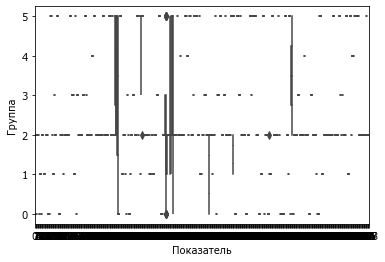

In [234]:
sns.boxplot(y='Группа',x='Показатель',data=df)

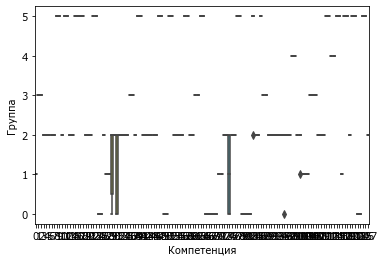

In [235]:
sns.boxplot(y='Группа',x='Компетенция',data=df)

# Классификация

### Используем TfidfVectorizer для измения словаря в число

In [7]:
tfidfconverter = TfidfVectorizer(max_df=0.8, max_features=10000, min_df=0.01, use_idf=True, ngram_range=(1,3))
X3 = tfidfconverter.fit_transform(df['Словарь']).toarray()

In [8]:
df['Матрица'] = X3

In [9]:
df.head(10)

,Компетенция,Показатель,Процент,Словарь,Группа,Матрица,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,77,186,13.0,продуктивный навык самый сравнение исследовате...,3,0.0,0.250789,0.250789,0.250789,0.250789,...,0.236989,0.228746,0.174391,0.208461,0.226285,0.254963,0.228746,0.223945,0.0,0.0
1,77,288,27.0,программирование ориентировать пользоваться ал...,3,0.0,0.255592,0.264505,0.255592,0.255592,...,0.255592,0.184854,0.241528,0.233126,0.177731,0.212453,0.230618,0.000000,0.0,0.0
2,77,10,30.0,сцена объект компонент игровой работать верста...,3,0.0,0.202191,0.218276,0.239311,0.239311,...,0.239311,0.173079,0.452284,0.218276,0.166409,0.198920,0.215928,0.000000,0.0,0.0
3,77,180,10.0,оптимизировать приложение игра мобильный оптим...,3,0.0,0.208093,0.217371,0.217371,0.217371,...,0.157211,0.205410,0.396529,0.151153,0.361366,0.392264,0.000000,0.000000,0.0,0.0
4,77,14,15.0,схема приложение проектирование важность умест...,3,0.0,0.188431,0.222668,0.208875,0.238562,...,0.238562,0.238562,0.172537,0.225435,0.217593,0.165888,0.396595,0.215252,0.0,0.0
5,77,318,5.0,билд приложение ос запустить продемонстрироват...,3,0.0,0.255577,0.255577,0.255577,0.255577,...,0.241513,0.233112,0.177720,0.424881,0.230605,0.000000,0.000000,0.000000,0.0,0.0
6,80,186,5.0,навык продуктивный самый сравнение работа иссл...,3,0.0,0.299832,0.441951,0.383737,0.469339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,80,359,5.0,проблема навык возникнуть решение разработка н...,3,0.0,0.334636,0.423817,0.377238,0.423817,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,80,15,30.0,схема проектирование приложение важность умест...,3,0.0,0.324034,0.382910,0.359190,0.392731,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,80,334,50.0,важность данные например разработка принятие в...,3,0.0,0.455775,0.400910,0.380963,0.461729,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


### Для входных данных используем атрибуты "Компетенция",  "Процент",  "Матрица",
### Для выходных "Группа"

##### Атрибут 'Показатель' нам не нужен так как мы занесли ключевые слова в словарь
##### Атрибут 'Словарь' нам не нужен так как мы превратили его в числа

In [241]:
X = df.drop(['Показатель','Словарь','Группа'],axis=1)
y = df['Группа']

In [242]:
# Разделим данные на обучающие на обучающие и тестовые с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=21)

### Построение модели 

In [243]:
# Используем 1 входной слой и 3 плотных слоя
model =  tf.keras.models.Sequential([
  Input(shape=(X.shape[1],)),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(6, activation='softmax')
])

In [244]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Обучение модели на наших данных

In [245]:
%%time
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 2ms/step - loss: 3.2902 - accuracy: 0.3194
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 1.9725 - accuracy: 0.3963
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 1.6337 - accuracy: 0.4047
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5778 - accuracy: 0.3913
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5830 - accuracy: 0.3746
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5773 - accuracy: 0.4097
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5404 - accuracy: 0.3796
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5174 - accuracy: 0.4064
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5297 - accuracy: 0.4047
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5110 - accuracy: 0.3997
Epoch 11/

In [246]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.4062 - accuracy: 0.4200


[1.4062118530273438, 0.41999998688697815]

### Точность модели = 0.42, потери = 1.4

In [231]:
df.head()

,Компетенция,Показатель,Процент,Словарь,Группа,Матрица,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,79,191,13,продуктивный навык самый сравнение исследовате...,3,"(0, 213)\t0.25078931442051977\n (0, 466)\t0...",0.250789,0.250789,0.250789,0.250789,...,0.236989,0.228746,0.174391,0.208461,0.226285,0.254963,0.228746,0.223945,0.0,0.0
1,79,293,27,программирование ориентировать пользоваться ал...,3,"(0, 12)\t0.2555920437198212\n (0, 421)\t0.2...",0.255592,0.264505,0.255592,0.255592,...,0.255592,0.184854,0.241528,0.233126,0.177731,0.212453,0.230618,0.000000,0.0,0.0
2,79,15,30,сцена объект компонент игровой работать верста...,3,"(0, 458)\t0.20219088664611898\n (0, 210)\t0...",0.202191,0.218276,0.239311,0.239311,...,0.239311,0.173079,0.452284,0.218276,0.166409,0.198920,0.215928,0.000000,0.0,0.0
3,79,185,10,оптимизировать приложение игра мобильный оптим...,3,"(0, 298)\t0.20809296774300734\n (0, 213)\t0...",0.208093,0.217371,0.217371,0.217371,...,0.157211,0.205410,0.396529,0.151153,0.361366,0.392264,0.000000,0.000000,0.0,0.0
4,79,19,15,схема приложение проектирование важность умест...,3,"(0, 34)\t0.18843107955188365\n (0, 432)\t0....",0.188431,0.222668,0.208875,0.238562,...,0.238562,0.238562,0.172537,0.225435,0.217593,0.165888,0.396595,0.215252,0.0,0.0


In [249]:
X = df.drop(['Матрица','Словарь','Группа'],axis=1)
y = df['Группа']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=21)

In [251]:
model =  tf.keras.models.Sequential([
  Input(shape=(X.shape[1],)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(6, activation='softmax')
])

In [252]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [253]:
%%time
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 2ms/step - loss: 5.1585 - accuracy: 0.3636
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 2.1461 - accuracy: 0.4512
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5131 - accuracy: 0.5008
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5786 - accuracy: 0.4860
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 1.4726 - accuracy: 0.4893
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 1.5788 - accuracy: 0.4876
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 1.4521 - accuracy: 0.5207
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 1.5089 - accuracy: 0.5174
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 1.4262 - accuracy: 0.5372
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 1.4511 - accuracy: 0.5124
Epoch 11/

In [254]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.3111 - accuracy: 0.5792


[1.3110923767089844, 0.5792078971862793]

### Точность 0.58 

### Класстеризация 

In [10]:
df.head()

,Компетенция,Показатель,Процент,Словарь,Группа,Матрица,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,77,186,13.0,продуктивный навык самый сравнение исследовате...,3,0.0,0.250789,0.250789,0.250789,0.250789,...,0.236989,0.228746,0.174391,0.208461,0.226285,0.254963,0.228746,0.223945,0.0,0.0
1,77,288,27.0,программирование ориентировать пользоваться ал...,3,0.0,0.255592,0.264505,0.255592,0.255592,...,0.255592,0.184854,0.241528,0.233126,0.177731,0.212453,0.230618,0.000000,0.0,0.0
2,77,10,30.0,сцена объект компонент игровой работать верста...,3,0.0,0.202191,0.218276,0.239311,0.239311,...,0.239311,0.173079,0.452284,0.218276,0.166409,0.198920,0.215928,0.000000,0.0,0.0
3,77,180,10.0,оптимизировать приложение игра мобильный оптим...,3,0.0,0.208093,0.217371,0.217371,0.217371,...,0.157211,0.205410,0.396529,0.151153,0.361366,0.392264,0.000000,0.000000,0.0,0.0
4,77,14,15.0,схема приложение проектирование важность умест...,3,0.0,0.188431,0.222668,0.208875,0.238562,...,0.238562,0.238562,0.172537,0.225435,0.217593,0.165888,0.396595,0.215252,0.0,0.0


### Преобразуем слова в вектора

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,1))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Словарь'])
print(tfidf_matrix.shape)

(807, 1834)


In [12]:
# матрица преобразуется в dataframe
tf_idf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix) 
tf_idf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

In [14]:
tf_idf_matrix = csr_matrix(tf_idf_df.values)

### Используем 3 модели для класстеризации

In [15]:
clusters_kmeans = KMeans(n_clusters=6, random_state=777).fit_predict(tf_idf_matrix)
clusters_hierar = AgglomerativeClustering(n_clusters=6, linkage='ward').fit_predict(tf_idf_df.values)
clusters_dbscan = DBSCAN(eps=0.3, min_samples=2).fit_predict(tf_idf_matrix)

### Используя метод главных компонентов, сократим до 2 атибутов

In [103]:
pca = PCA(n_components=2) 
points = pca.fit_transform(tf_idf_df.values) 
# доля отклонения, объясняемый каждым из выбранных компонентов
print(pca.explained_variance_ratio_) 

[0.01701848 0.01452264]


### Визуализируем кластеры 

In [104]:
x, y = zip(*points)

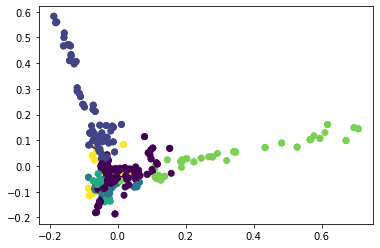

In [13]:
plt.scatter(x, y, c=clusters_kmeans)

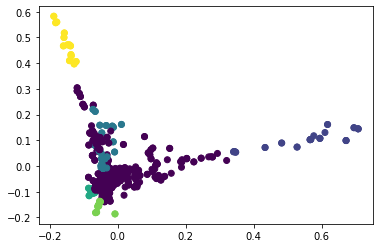

In [14]:
plt.scatter(x, y, c=clusters_hierar)

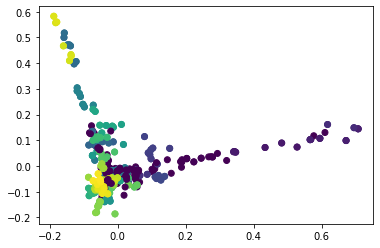

In [15]:
plt.scatter(x, y, c=clusters_dbscan)

### Посмотрим как распределились данные

In [16]:
out = {'cluster': clusters_kmeans}
frame = pd.DataFrame(out, columns = ['cluster'])
frame['cluster'].value_counts()

0    422
1    132
4     87
5     73
2     69
3     24
Name: cluster, dtype: int64

In [17]:
out = {'cluster': clusters_hierar }
frame = pd.DataFrame(out, columns = ['cluster'])
frame['cluster'].value_counts()

0    652
2     57
1     32
5     28
3     20
4     18
Name: cluster, dtype: int64

In [18]:
out = {'cluster': clusters_dbscan }
frame = pd.DataFrame(out, columns = ['cluster'])
frame['cluster'].value_counts()

-1      279
 20       3
 21       3
 22       3
 23       3
       ... 
 169      2
 168      2
 167      2
 166      2
 0        2
Name: cluster, Length: 263, dtype: int64

### Классификация текста

### Разделим на обучающую, тестовую и валидационную выборку

In [58]:
train_part = 0.75

train_size = int(train_part * tf_idf_matrix.shape[0])
test_size = tf_idf_matrix.shape[0] - train_size

print(train_size, test_size, tf_idf_matrix.shape[0])

605 202 807


In [59]:
df_train = tf_idf_df.loc[:train_size]
df_test = tf_idf_df.loc[train_size:]

In [60]:
df_train.loc[:, 'Группа'] = df.loc[:train_size, 'Группа']
df_test.loc[:, 'Группа'] = df.loc[train_size:, 'Группа']

C:\anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
Y = df_train.loc[:, 'Группа']
X = df_train.drop('Группа',axis=1)

In [62]:
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)

In [63]:
y_test = df_test.loc[:, 'Группа']
X_test = df_test.drop('Группа',axis=1)

In [65]:
X_train,X_valid,y_train,y_valid = train_test_split(X, Y, train_size=train_part, stratify=Y,
                                                    random_state=777)

### Используем 3 модели для классификации

In [66]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

In [67]:
MultinomialNB_model = MultinomialNB().fit(X_train, y_train)
BernoulliNB_model = BernoulliNB().fit(X_train, y_train)
GaussianNB_model = GaussianNB().fit(X_train, y_train)

### Посмотрим на результаты

In [68]:
# Точность классификаторов на обучающих данных
train_score = [
    MultinomialNB_model.score(X_train, y_train),
    BernoulliNB_model.score(X_train, y_train),
    GaussianNB_model.score(X_train, y_train)
]

# Точность классификаторов на валидационной выборке
valid_score = [
    MultinomialNB_model.score(X_valid, y_valid),
    BernoulliNB_model.score(X_valid, y_valid),
    GaussianNB_model.score(X_valid, y_valid)
]

# Таблица результатов
score_df = pd.DataFrame([train_score, valid_score]).T
score_df.columns = ['train', 'valid']
score_df.index = ['MultinomialNB', 'BernoulliNB', 'GaussianNB']

In [69]:
score_df

,train,valid
MultinomialNB,0.997797,1.000000
BernoulliNB,0.896476,0.881579
GaussianNB,1.000000,1.000000


In [70]:
MultinomialNB_model = MultinomialNB().fit(X, Y)
predict_test = MultinomialNB_model.predict(X_test)
MultinomialNB_model.score(X_test, y_test)

0.806930693069307

In [71]:
BernoulliNB_model = BernoulliNB().fit(X, Y)
predict_test = BernoulliNB_model.predict(X_test)
BernoulliNB_model.score(X_test, y_test)

0.7920792079207921

### Обучим модель нейросети 

In [69]:
model =  tf.keras.models.Sequential([
  Input(shape=(X.shape[1],)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(6, activation='softmax')
])

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
%%time
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 1.7345 - accuracy: 0.4734
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 1.3847 - accuracy: 0.5352
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.7950 - accuracy: 0.6604
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.9057
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9657
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 1.0000
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 11/

### Результаты

In [72]:
model.evaluate(X_valid, y_valid)

4/4 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9806


[0.029800307005643845, 0.9805825352668762]

In [73]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.8677 - accuracy: 0.7623


[0.8676661252975464, 0.7622950673103333]